# THIS IS A HYBRID ENSEMBLE AS META LEARNER I AM USING CAPSULENET AND FOR META FEATURES I AM USING THE BASE ENSEMBLES OF BAYESIAN MODEL AVERAGING AND MAJORITY VOTE 


In [1]:
import pandas as pd

# Load Bayesian predictions for each task
bayesian_predictions_snli = pd.read_csv("/kaggle/input/hybrid/bayesian_predictions_all.csv")
bayesian_predictions_mnli_matched = pd.read_csv("/kaggle/input/hybrid/bayesian_predictions_mnli_matched.csv")
bayesian_predictions_mnli_mismatched = pd.read_csv("/kaggle/input/hybrid/bayesian_predictions_mnli_mismatched.csv")
bayesian_predictions_anli_r1 = pd.read_csv("/kaggle/input/hybrid/bayesian_predictions_anli_r1.csv")
bayesian_predictions_anli_r2 = pd.read_csv("/kaggle/input/hybrid/bayesian_predictions_anli_r2.csv")
bayesian_predictions_anli_r3 = pd.read_csv("/kaggle/input/hybrid/bayesian_predictions_anli_r3.csv")
bayesian_predictions_all = pd.read_csv("/kaggle/input/hybrid/bayesian_predictions_all.csv")

In [2]:
bayesian_predictions_snli

,Entailment,Neutral,Contradiction,True_Label
0,0.013525,0.940412,0.046063,1
1,0.654903,0.257940,0.087157,0
2,0.125068,0.028672,0.846260,2
3,0.017663,0.976611,0.005726,1
4,0.341223,0.570733,0.088045,0
...,...,...,...,...
32666,0.086380,0.240948,0.672672,2
32667,0.124037,0.364951,0.511013,2
32668,0.256775,0.275861,0.467364,2
32669,0.068580,0.199968,0.731452,2


In [3]:
bayesian_predictions_all

,Entailment,Neutral,Contradiction,True_Label
0,0.013525,0.940412,0.046063,1
1,0.654903,0.257940,0.087157,0
2,0.125068,0.028672,0.846260,2
3,0.017663,0.976611,0.005726,1
4,0.341223,0.570733,0.088045,0
...,...,...,...,...
32666,0.086380,0.240948,0.672672,2
32667,0.124037,0.364951,0.511013,2
32668,0.256775,0.275861,0.467364,2
32669,0.068580,0.199968,0.731452,2


In [4]:
bayesian_predictions_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32671 entries, 0 to 32670
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Entailment     32671 non-null  float64
 1   Neutral        32671 non-null  float64
 2   Contradiction  32671 non-null  float64
 3   True_Label     32671 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 1021.1 KB


In [5]:
# Load majority vote predictions for each task
majorityvote_predictions_snli = pd.read_csv("/kaggle/input/hybrid/majorityvote_predictions_snli.csv").astype(int)
majorityvote_predictions_mnli_matched = pd.read_csv("/kaggle/input/hybrid/majorityvote_predictions_mnli_matched.csv").astype(int)
majorityvote_predictions_mnli_mismatched = pd.read_csv("/kaggle/input/hybrid/majorityvote_predictions_mnli_mismatched.csv").astype(int)
majorityvote_predictions_anli_r1 = pd.read_csv("/kaggle/input/hybrid/majorityvote_predictions_anli_r1.csv").astype(int)
majorityvote_predictions_anli_r2 = pd.read_csv("/kaggle/input/hybrid/majorityvote_predictions_anli_r2.csv").astype(int)
majorityvote_predictions_anli_r3 = pd.read_csv("/kaggle/input/hybrid/majorityvote_predictions_anli_r3.csv").astype(int)
majorityvote_predictions_all = pd.read_csv("/kaggle/input/hybrid/majorityvote_predictions_all.csv").astype(int)

In [6]:
majorityvote_predictions_snli

,Ensemble_Prediction,True_Label
0,1,1
1,0,0
2,2,2
3,1,1
4,1,0
...,...,...
9819,2,2
9820,0,0
9821,2,2
9822,0,0


In [7]:
majorityvote_predictions_snli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9824 entries, 0 to 9823
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Ensemble_Prediction  9824 non-null   int64
 1   True_Label           9824 non-null   int64
dtypes: int64(2)
memory usage: 153.6 KB


In [8]:
majorityvote_predictions_all

,Ensemble_Prediction,True_Label
0,1,1
1,0,0
2,2,2
3,1,1
4,1,0
...,...,...
32666,2,2
32667,0,2
32668,0,2
32669,2,2


In [9]:
majorityvote_predictions_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32671 entries, 0 to 32670
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Ensemble_Prediction  32671 non-null  int64
 1   True_Label           32671 non-null  int64
dtypes: int64(2)
memory usage: 510.6 KB


In [10]:
import pandas as pd


# Dropping the True_Label column from Majority Vote predictions for all tasks
majorityvote_predictions_snli = majorityvote_predictions_snli.drop(columns=['True_Label'])
majorityvote_predictions_mnli_matched = majorityvote_predictions_mnli_matched.drop(columns=['True_Label'])
majorityvote_predictions_mnli_mismatched = majorityvote_predictions_mnli_mismatched.drop(columns=['True_Label'])
majorityvote_predictions_anli_r1 = majorityvote_predictions_anli_r1.drop(columns=['True_Label'])
majorityvote_predictions_anli_r2 = majorityvote_predictions_anli_r2.drop(columns=['True_Label'])
majorityvote_predictions_anli_r3 = majorityvote_predictions_anli_r3.drop(columns=['True_Label'])
majorityvote_predictions_all = majorityvote_predictions_all.drop(columns=['True_Label'])

# Renaming the prediction column for clarity in concatenated DataFrame
majorityvote_predictions_snli.columns = ['Majority_Vote_Prediction']
majorityvote_predictions_mnli_matched.columns = ['Majority_Vote_Prediction']
majorityvote_predictions_mnli_mismatched.columns = ['Majority_Vote_Prediction']
majorityvote_predictions_anli_r1.columns = ['Majority_Vote_Prediction']
majorityvote_predictions_anli_r2.columns = ['Majority_Vote_Prediction']
majorityvote_predictions_anli_r3.columns = ['Majority_Vote_Prediction']
majorityvote_predictions_all.columns = ['Majority_Vote_Prediction']

# Stacking Bayesian predictions with Majority Vote predictions
stacked_predictions_snli = pd.concat([bayesian_predictions_snli, majorityvote_predictions_snli], axis=1)
stacked_predictions_mnli_matched = pd.concat([bayesian_predictions_mnli_matched, majorityvote_predictions_mnli_matched], axis=1)
stacked_predictions_mnli_mismatched = pd.concat([bayesian_predictions_mnli_mismatched, majorityvote_predictions_mnli_mismatched], axis=1)
stacked_predictions_anli_r1 = pd.concat([bayesian_predictions_anli_r1, majorityvote_predictions_anli_r1], axis=1)
stacked_predictions_anli_r2 = pd.concat([bayesian_predictions_anli_r2, majorityvote_predictions_anli_r2], axis=1)
stacked_predictions_anli_r3 = pd.concat([bayesian_predictions_anli_r3, majorityvote_predictions_anli_r3], axis=1)
stacked_predictions_all = pd.concat([bayesian_predictions_all, majorityvote_predictions_all], axis=1)


In [11]:
stacked_predictions_snli.head()

,Entailment,Neutral,Contradiction,True_Label,Majority_Vote_Prediction
0,0.013525,0.940412,0.046063,1,1.0
1,0.654903,0.257940,0.087157,0,0.0
2,0.125068,0.028672,0.846260,2,2.0
3,0.017663,0.976611,0.005726,1,1.0
4,0.341223,0.570733,0.088045,0,1.0


In [12]:
# Remove NaN values from all tasks' DataFrames
stacked_predictions_snli = stacked_predictions_snli.dropna()
stacked_predictions_mnli_matched = stacked_predictions_mnli_matched.dropna()
stacked_predictions_mnli_mismatched = stacked_predictions_mnli_mismatched.dropna()
stacked_predictions_anli_r1 = stacked_predictions_anli_r1.dropna()
stacked_predictions_anli_r2 = stacked_predictions_anli_r2.dropna()
stacked_predictions_anli_r3 = stacked_predictions_anli_r3.dropna()
stacked_predictions_all = stacked_predictions_all.dropna()

# Optionally, verify removal of NaNs by checking for NaN counts
print("NaNs in SNLI:", stacked_predictions_snli.isnull().sum().sum())
print("NaNs in MNLI Matched:", stacked_predictions_mnli_matched.isnull().sum().sum())
print("NaNs in MNLI Mismatched:", stacked_predictions_mnli_mismatched.isnull().sum().sum())
print("NaNs in ANLI R1:", stacked_predictions_anli_r1.isnull().sum().sum())
print("NaNs in ANLI R2:", stacked_predictions_anli_r2.isnull().sum().sum())
print("NaNs in ANLI R3:", stacked_predictions_anli_r3.isnull().sum().sum())
print("NaNs in All Tasks Combined:", stacked_predictions_all.isnull().sum().sum())


NaNs in SNLI: 0
NaNs in MNLI Matched: 0
NaNs in MNLI Mismatched: 0
NaNs in ANLI R1: 0
NaNs in ANLI R2: 0
NaNs in ANLI R3: 0
NaNs in All Tasks Combined: 0


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf



# Features and Labels
X_snli = stacked_predictions_snli.drop(['True_Label'], axis=1).values
y_snli = stacked_predictions_snli['True_Label'].values

# MNLI Matched
X_mnli_matched = stacked_predictions_mnli_matched.drop(['True_Label'], axis=1).values
y_mnli_matched = stacked_predictions_mnli_matched['True_Label'].values

# MNLI Mismatched
X_mnli_mismatched = stacked_predictions_mnli_mismatched.drop(['True_Label'], axis=1).values
y_mnli_mismatched = stacked_predictions_mnli_mismatched['True_Label'].values

# ANLI R1
X_anli_r1 = stacked_predictions_anli_r1.drop(['True_Label'], axis=1).values
y_anli_r1 = stacked_predictions_anli_r1['True_Label'].values

# ANLI R2
X_anli_r2 = stacked_predictions_anli_r2.drop(['True_Label'], axis=1).values
y_anli_r2 = stacked_predictions_anli_r2['True_Label'].values

# ANLI R3
X_anli_r3 = stacked_predictions_anli_r3.drop(['True_Label'], axis=1).values
y_anli_r3 = stacked_predictions_anli_r3['True_Label'].values

# Assuming there is also a combined dataset for all tasks
X_all = stacked_predictions_all.drop(['True_Label'], axis=1).values
y_all = stacked_predictions_all['True_Label'].values

2024-05-14 14:24:34.219748: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-14 14:24:34.219874: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-14 14:24:34.353190: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [14]:
X_snli

array([[1.35253996e-02, 9.40411886e-01, 4.60627140e-02, 1.00000000e+00],
       [6.54903313e-01, 2.57939706e-01, 8.71569810e-02, 0.00000000e+00],
       [1.25068237e-01, 2.86716618e-02, 8.46260101e-01, 2.00000000e+00],
       ...,
       [1.23339602e-01, 1.56971135e-03, 8.75090687e-01, 2.00000000e+00],
       [8.62843559e-01, 1.39069993e-02, 1.23249441e-01, 0.00000000e+00],
       [3.06395970e-03, 9.93139487e-01, 3.79655313e-03, 1.00000000e+00]])

In [15]:
X_snli.shape

(9824, 4)

In [16]:
y_snli

array([1, 0, 2, ..., 2, 0, 1])

In [17]:
X_anli_r1

array([[0.01037405, 0.98191555, 0.0077104 , 1.        ],
       [0.75843987, 0.22898012, 0.01258001, 0.        ],
       [0.00191631, 0.99354261, 0.00454108, 0.        ],
       ...,
       [0.33644946, 0.16918603, 0.4943645 , 1.        ],
       [0.19753294, 0.02745763, 0.77500943, 1.        ],
       [0.77433342, 0.01221364, 0.21345293, 0.        ]])

In [18]:
X_anli_r1.shape

(1000, 4)

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Step 1: Feature Scaling
scaler = StandardScaler()

# Fit the scaler to each task's feature data
X_snli_scaled = scaler.fit_transform(X_snli)
X_mnli_matched_scaled = scaler.fit_transform(X_mnli_matched)
X_mnli_mismatched_scaled = scaler.fit_transform(X_mnli_mismatched)
X_anli_r1_scaled = scaler.fit_transform(X_anli_r1)
X_anli_r2_scaled = scaler.fit_transform(X_anli_r2)
X_anli_r3_scaled = scaler.fit_transform(X_anli_r3)

# Step 2: Label Encoding (One-Hot Encoding) - Updated to prevent FutureWarning
encoder = OneHotEncoder()  # No need to specify sparse=False, default is now dense output

# Encode the labels for each task
y_snli_encoded = encoder.fit_transform(y_snli.reshape(-1, 1))
y_mnli_matched_encoded = encoder.fit_transform(y_mnli_matched.reshape(-1, 1))
y_mnli_mismatched_encoded = encoder.fit_transform(y_mnli_mismatched.reshape(-1, 1))
y_anli_r1_encoded = encoder.fit_transform(y_anli_r1.reshape(-1, 1))
y_anli_r2_encoded = encoder.fit_transform(y_anli_r2.reshape(-1, 1))
y_anli_r3_encoded = encoder.fit_transform(y_anli_r3.reshape(-1, 1))


In [20]:
# Convert sparse matrix to dense
y_snli_encoded_dense = y_snli_encoded.toarray()

# Example: Viewing the first 5 encoded labels
print(y_snli_encoded_dense[:5])


[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [21]:
from sklearn.model_selection import train_test_split

# Define the test size and random state for reproducibility
test_size = 0.2
random_state = 42

# Split data for SNLI task
X_snli_train, X_snli_test, y_snli_train, y_snli_test = train_test_split(
    X_snli_scaled, y_snli_encoded, test_size=test_size, random_state=random_state
)

# Split data for MNLI-matched task
X_mnli_matched_train, X_mnli_matched_test, y_mnli_matched_train, y_mnli_matched_test = train_test_split(
    X_mnli_matched_scaled, y_mnli_matched_encoded, test_size=test_size, random_state=random_state
)

# Split data for MNLI-mismatched task
X_mnli_mismatched_train, X_mnli_mismatched_test, y_mnli_mismatched_train, y_mnli_mismatched_test = train_test_split(
    X_mnli_mismatched_scaled, y_mnli_mismatched_encoded, test_size=test_size, random_state=random_state
)

# Split data for ANLI Round 1 task
X_anli_r1_train, X_anli_r1_test, y_anli_r1_train, y_anli_r1_test = train_test_split(
    X_anli_r1_scaled, y_anli_r1_encoded, test_size=test_size, random_state=random_state
)

# Split data for ANLI Round 2 task
X_anli_r2_train, X_anli_r2_test, y_anli_r2_train, y_anli_r2_test = train_test_split(
    X_anli_r2_scaled, y_anli_r2_encoded, test_size=test_size, random_state=random_state
)

# Split data for ANLI Round 3 task
X_anli_r3_train, X_anli_r3_test, y_anli_r3_train, y_anli_r3_test = train_test_split(
    X_anli_r3_scaled, y_anli_r3_encoded, test_size=test_size, random_state=random_state
)

In [22]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

# Adjusted Capsule Layer
class CapsuleLayer(layers.Layer):
    def __init__(self, num_capsules, dim_capsules, num_routing=3, **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsules = num_capsules
        self.dim_capsules = dim_capsules
        self.num_routing = num_routing
    
    def build(self, input_shape):
        self.kernel = self.add_weight(
            shape=(input_shape[-1], self.num_capsules * self.dim_capsules),
            initializer="glorot_uniform",
            name="capsule_kernel",
        )
    
    def call(self, inputs):
        outputs = tf.matmul(inputs, self.kernel)
        outputs = tf.reshape(outputs, (-1, self.num_capsules, self.dim_capsules))
        
        b = tf.zeros(shape=(tf.shape(inputs)[0], self.num_capsules, 1))
        for _ in range(self.num_routing):
            c = tf.nn.softmax(b, axis=1)
            outputs = c * outputs
            outputs = self.squash(outputs)
            b += tf.reduce_sum(outputs * outputs, axis=-1, keepdims=True)
        
        return outputs
    
    @staticmethod
    def squash(vector):
        squared_norm = tf.reduce_sum(tf.square(vector), axis=-1, keepdims=True)
        scale = squared_norm / (1 + squared_norm) / tf.sqrt(squared_norm)
        return scale * vector


In [23]:
# Ensure Data is in Correct Format
def ensure_dense(data):
    if hasattr(data, 'toarray'):
        return data.toarray()
    return data

# Apply Data Conversion and Reshaping for Other Tasks
X_snli_train = ensure_dense(X_snli_train)
X_snli_test = ensure_dense(X_snli_test)
y_snli_train = ensure_dense(y_snli_train)
y_snli_test = ensure_dense(y_snli_test)

# Apply Data Conversion and Reshaping for Other Tasks
X_mnli_matched_train = ensure_dense(X_mnli_matched_train)
X_mnli_matched_test = ensure_dense(X_mnli_matched_test)
y_mnli_matched_train = ensure_dense(y_mnli_matched_train)
y_mnli_matched_test = ensure_dense(y_mnli_matched_test)

X_mnli_mismatched_train = ensure_dense(X_mnli_mismatched_train)
X_mnli_mismatched_test = ensure_dense(X_mnli_mismatched_test)
y_mnli_mismatched_train = ensure_dense(y_mnli_mismatched_train)
y_mnli_mismatched_test = ensure_dense(y_mnli_mismatched_test)

X_anli_r1_train = ensure_dense(X_anli_r1_train)
X_anli_r1_test = ensure_dense(X_anli_r1_test)
y_anli_r1_train = ensure_dense(y_anli_r1_train)
y_anli_r1_test = ensure_dense(y_anli_r1_test)

X_anli_r2_train = ensure_dense(X_anli_r2_train)
X_anli_r2_test = ensure_dense(X_anli_r2_test)
y_anli_r2_train = ensure_dense(y_anli_r2_train)
y_anli_r2_test = ensure_dense(y_anli_r2_test)

X_anli_r3_train = ensure_dense(X_anli_r3_train)
X_anli_r3_test = ensure_dense(X_anli_r3_test)
y_anli_r3_train = ensure_dense(y_anli_r3_train)
y_anli_r3_test = ensure_dense(y_anli_r3_test)

In [24]:
# Function to reshape 1D arrays into 2D if needed
def ensure_reshaped(data):
    if len(data.shape) == 1:
        return data.reshape((-1, 1))
    return data

# Reshape the training and test sets for all tasks
# SNLI
X_snli_train = ensure_reshaped(X_snli_train)
X_snli_test = ensure_reshaped(X_snli_test)

# Reshape the training and test sets for all tasks
# MNLI Matched
X_mnli_matched_train = ensure_reshaped(X_mnli_matched_train)
X_mnli_matched_test = ensure_reshaped(X_mnli_matched_test)

# MNLI Mismatched
X_mnli_mismatched_train = ensure_reshaped(X_mnli_mismatched_train)
X_mnli_mismatched_test = ensure_reshaped(X_mnli_mismatched_test)

# ANLI Round 1
X_anli_r1_train = ensure_reshaped(X_anli_r1_train)
X_anli_r1_test = ensure_reshaped(X_anli_r1_test)

# ANLI Round 2
X_anli_r2_train = ensure_reshaped(X_anli_r2_train)
X_anli_r2_test = ensure_reshaped(X_anli_r2_test)

# ANLI Round 3
X_anli_r3_train = ensure_reshaped(X_anli_r3_train)
X_anli_r3_test = ensure_reshaped(X_anli_r3_test)

# Reshape the labels as well if required
y_mnli_matched_train = ensure_reshaped(y_mnli_matched_train)
y_mnli_matched_test = ensure_reshaped(y_mnli_matched_test)

y_mnli_mismatched_train = ensure_reshaped(y_mnli_mismatched_train)
y_mnli_mismatched_test = ensure_reshaped(y_mnli_mismatched_test)

y_anli_r1_train = ensure_reshaped(y_anli_r1_train)
y_anli_r1_test = ensure_reshaped(y_anli_r1_test)

y_anli_r2_train = ensure_reshaped(y_anli_r2_train)
y_anli_r2_test = ensure_reshaped(y_anli_r2_test)

y_anli_r3_train = ensure_reshaped(y_anli_r3_train)
y_anli_r3_test = ensure_reshaped(y_anli_r3_test)

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


# Function to create a simple dense model with regularization
def create_simple_dense_model(input_shape, num_classes):
    inputs = keras.Input(shape=(input_shape,))
    dense_layer = layers.Dense(64, activation='relu')(inputs)  # Simplified model
    dropout_layer = layers.Dropout(0.2)(dense_layer)  # Reduced dropout
    dense_layer_2 = layers.Dense(32, activation='relu')(dropout_layer)
    outputs = layers.Dense(num_classes, activation='softmax')(dense_layer_2)
    
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

# Function to train and evaluate the model, returning history, test loss/accuracy, and the trained model
def train_and_evaluate(X_train, y_train, X_test, y_test, epochs=20, batch_size=32):
    model = create_simple_dense_model(
        input_shape=X_train.shape[1],  # Input feature count
        num_classes=y_train.shape[1],  # Number of output classes
    )
    
    optimizer = keras.optimizers.Adam(learning_rate=0.0005)  # Set learning rate
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Callbacks for early stopping and learning rate adjustment
    callbacks = [
        EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
    ]
    
    # Fit the model with validation data and callbacks
    history = model.fit(
        X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=callbacks
    )
    
    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    
    # Return history, test loss, test accuracy, and the model
    return history, test_loss, test_accuracy, model

In [26]:
import matplotlib.pyplot as plt

# Function to plot training/validation accuracy and loss from history
def plot_training_history(history, title_prefix="Model"):
    # Create subplots for accuracy and loss
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Accuracy plot (training and validation)
    axes[0].plot(history.history['accuracy'], label='Training Accuracy')
    axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--')
    axes[0].set_title(f'{title_prefix} - Training and Validation Accuracy')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Accuracy')
    axes[0].legend()
    axes[0].grid(True)

    # Loss plot (training and validation)
    axes[1].plot(history.history['loss'], label='Training Loss')
    axes[1].plot(history.history['val_loss'], label='Validation Loss', linestyle='--')
    axes[1].set_title(f'{title_prefix} - Training and Validation Loss')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Loss')
    axes[1].legend()
    axes[1].grid(True)

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()


In [27]:
# Call the function for a specific task (example: snli)
history_snli, test_loss_snli, test_accuracy_snli, trained_model_snli = train_and_evaluate(
    X_snli_train, y_snli_train, X_snli_test, y_snli_test, epochs=20, batch_size=32
)

print("Test loss on SNLI:", test_loss_snli)
print("Test accuracy on SNLI:", test_accuracy_snli)

# Now you can use `history` to plot the training and validation loss/accuracy over epochs


Epoch 1/20
 87/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5778 - loss: 0.9706

I0000 00:00:1715696689.458723      81 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


246/246 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7418 - loss: 0.7111 - val_accuracy: 0.9242 - val_loss: 0.2390 - learning_rate: 5.0000e-04
Epoch 2/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9149 - loss: 0.2580 - val_accuracy: 0.9293 - val_loss: 0.2239 - learning_rate: 5.0000e-04
Epoch 3/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9214 - loss: 0.2471 - val_accuracy: 0.9313 - val_loss: 0.2187 - learning_rate: 5.0000e-04
Epoch 4/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9239 - loss: 0.2350 - val_accuracy: 0.9303 - val_loss: 0.2130 - learning_rate: 5.0000e-04
Epoch 5/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9297 - loss: 0.2220 - val_accuracy: 0.9313 - val_loss: 0.2115 - learning_rate: 5.0000e-04
Epoch 6/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9277 - loss: 0.2279 - val_accuracy: 0.9318 - val_loss: 0.2096 - learning_rate: 5.0000e-04
Epoch 7/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9291 - l

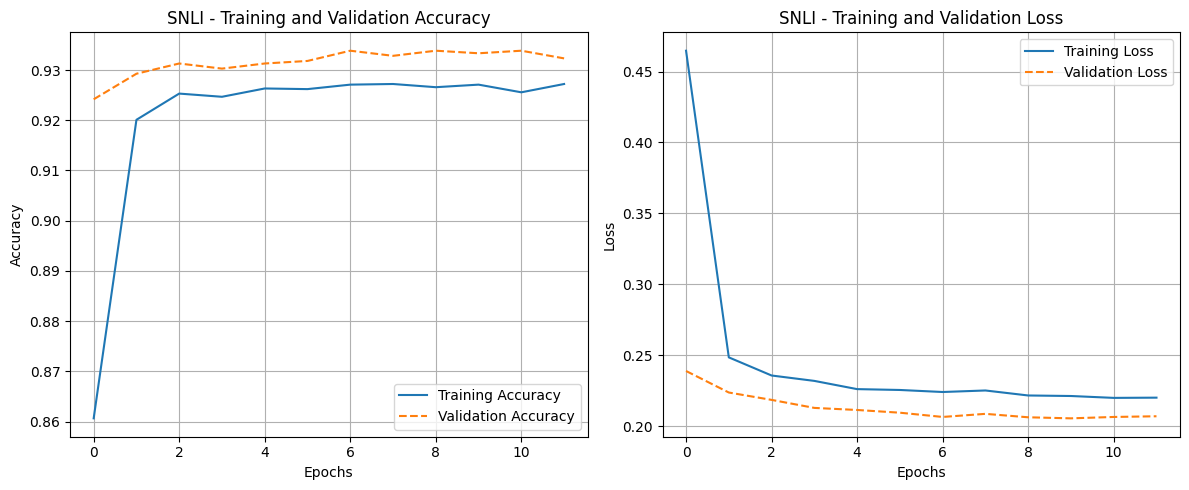

In [28]:
# SNLI
plot_training_history(history_snli, title_prefix="SNLI")

In [29]:
# Call the function for a specific task (example: MNLI matched)
history_mnli_matched, test_loss_mnli_matched, test_accuracy_mnli_matched, trained_model_mnli_matched = train_and_evaluate(
    X_mnli_matched_train, y_mnli_matched_train, X_mnli_matched_test, y_mnli_matched_test, epochs=20, batch_size=32
)

print("Test loss on MNLI-m:", test_loss_mnli_matched)
print("Test accuracy on MNLI-m:", test_accuracy_mnli_matched)

# Now you can use `history` to plot the training and validation loss/accuracy over epochs


Epoch 1/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.7840 - loss: 0.6651 - val_accuracy: 0.9109 - val_loss: 0.2652 - learning_rate: 5.0000e-04
Epoch 2/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9184 - loss: 0.2658 - val_accuracy: 0.9129 - val_loss: 0.2534 - learning_rate: 5.0000e-04
Epoch 3/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9113 - loss: 0.2736 - val_accuracy: 0.9144 - val_loss: 0.2499 - learning_rate: 5.0000e-04
Epoch 4/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9168 - loss: 0.2541 - val_accuracy: 0.9144 - val_loss: 0.2462 - learning_rate: 5.0000e-04
Epoch 5/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9173 - loss: 0.2517 - val_accuracy: 0.9144 - val_loss: 0.2451 - learning_rate: 5.0000e-04
Epoch 6/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9119 - loss: 0.2609 - val_accuracy: 0.9159 - val_loss: 0.2429 - learning_rate: 5.0000e-04
Epoch 7/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy:

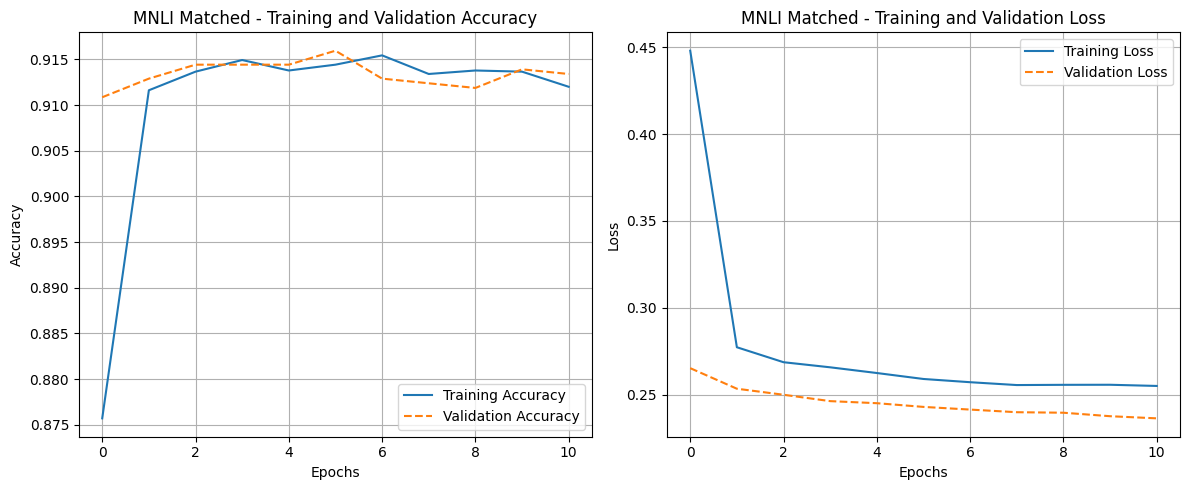

In [30]:
# MNLI Matched
plot_training_history(history_mnli_matched, title_prefix="MNLI Matched")



In [31]:
# Call the function for MNLI mismatched
history_mnli_mismatched, test_loss_mnli_mismatched, test_accuracy_mnli_mismatched, trained_model_mnli_mismatched = train_and_evaluate(
    X_mnli_mismatched_train, y_mnli_mismatched_train, X_mnli_mismatched_test, y_mnli_mismatched_test, epochs=20, batch_size=32
)

print("Test loss on MNLI-mm:", test_loss_mnli_mismatched)
print("Test accuracy on MNLI-mm:", test_accuracy_mnli_mismatched)

Epoch 1/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.7720 - loss: 0.6596 - val_accuracy: 0.9110 - val_loss: 0.2849 - learning_rate: 5.0000e-04
Epoch 2/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9109 - loss: 0.2777 - val_accuracy: 0.9100 - val_loss: 0.2727 - learning_rate: 5.0000e-04
Epoch 3/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9097 - loss: 0.2689 - val_accuracy: 0.9115 - val_loss: 0.2661 - learning_rate: 5.0000e-04
Epoch 4/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9088 - loss: 0.2727 - val_accuracy: 0.9105 - val_loss: 0.2634 - learning_rate: 5.0000e-04
Epoch 5/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9125 - loss: 0.2479 - val_accuracy: 0.9105 - val_loss: 0.2600 - learning_rate: 5.0000e-04
Epoch 6/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9173 - loss: 0.2344 - val_accuracy: 0.9090 - val_loss: 0.2588 - learning_rate: 5.0000e-04
Epoch 7/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy:

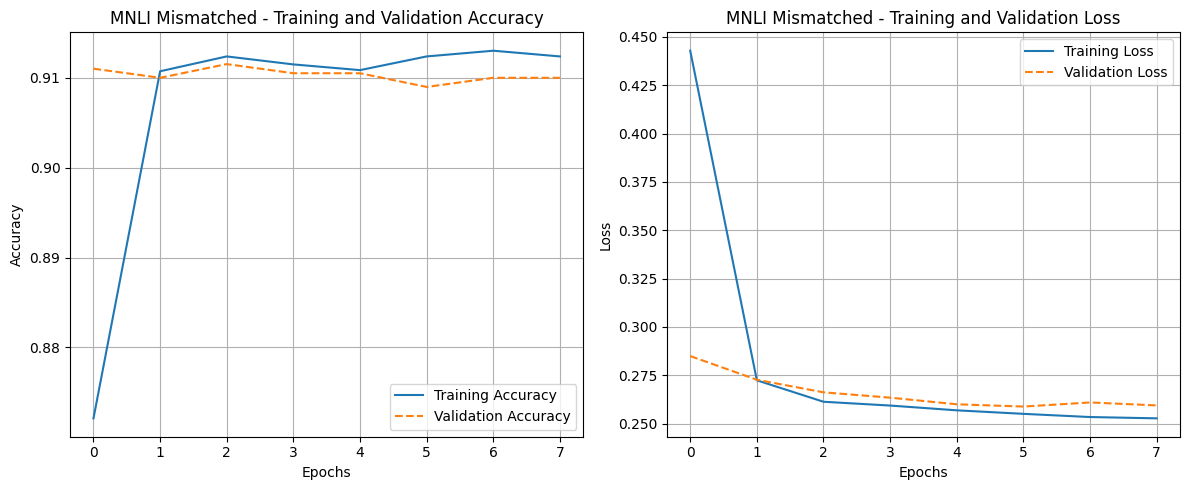

In [32]:
# MNLI Mismatched
plot_training_history(history_mnli_mismatched, title_prefix="MNLI Mismatched")


In [33]:
# Call the function for ANLI round 1
history_anli_r1, test_loss_anli_r1, test_accuracy_anli_r1, trained_model_anli_r1 = train_and_evaluate(
    X_anli_r1_train, y_anli_r1_train, X_anli_r1_test, y_anli_r1_test, epochs=20, batch_size=32
)

print("Test loss on ANLI R1:", test_loss_anli_r1)
print("Test accuracy on ANLI R1:", test_accuracy_anli_r1)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.2502 - loss: 1.2135 - val_accuracy: 0.3800 - val_loss: 1.1104 - learning_rate: 5.0000e-04
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3715 - loss: 1.0920 - val_accuracy: 0.4800 - val_loss: 1.0337 - learning_rate: 5.0000e-04
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5067 - loss: 1.0218 - val_accuracy: 0.6150 - val_loss: 0.9725 - learning_rate: 5.0000e-04
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5611 - loss: 0.9814 - val_accuracy: 0.6300 - val_loss: 0.9229 - learning_rate: 5.0000e-04
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6136 - loss: 0.9366 - val_accuracy: 0.6150 - val_loss: 0.8910 - learning_rate: 5.0000e-04
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6231 - loss: 0.9168 - val_accuracy: 0.6100 - val_loss: 0.8715 - learning_rate: 5.0000e-04
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6182 - loss

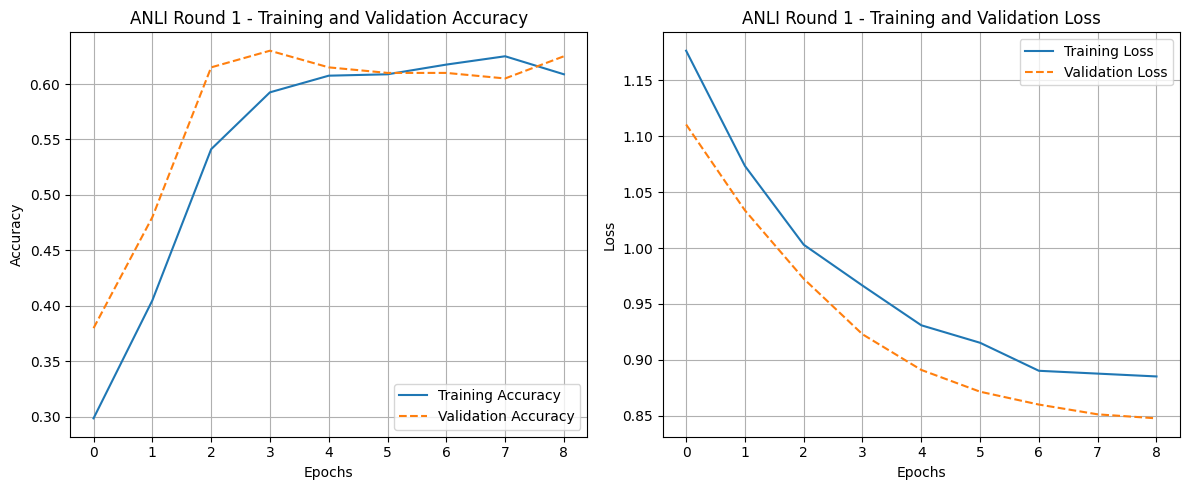

In [34]:
# ANLI Round 1
plot_training_history(history_anli_r1, title_prefix="ANLI Round 1")

In [35]:
# Call the function for ANLI round 2
history_anli_r2, test_loss_anli_r2, test_accuracy_anli_r2, trained_model_anli_r2 = train_and_evaluate(
    X_anli_r2_train, y_anli_r2_train, X_anli_r2_test, y_anli_r2_test, epochs=20, batch_size=32
)

print("Test loss on ANLI R2:", test_loss_anli_r2)
print("Test accuracy on ANLI R2:", test_accuracy_anli_r2)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.4956 - loss: 1.0360 - val_accuracy: 0.6500 - val_loss: 0.9237 - learning_rate: 5.0000e-04
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6214 - loss: 0.9349 - val_accuracy: 0.6500 - val_loss: 0.8808 - learning_rate: 5.0000e-04
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6089 - loss: 0.9062 - val_accuracy: 0.6700 - val_loss: 0.8621 - learning_rate: 5.0000e-04
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6080 - loss: 0.9078 - val_accuracy: 0.6700 - val_loss: 0.8537 - learning_rate: 5.0000e-04
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6218 - loss: 0.8769 - val_accuracy: 0.6950 - val_loss: 0.8430 - learning_rate: 5.0000e-04
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6257 - loss: 0.8902 - val_accuracy: 0.6900 - val_loss: 0.8393 - learning_rate: 5.0000e-04
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6273 - loss

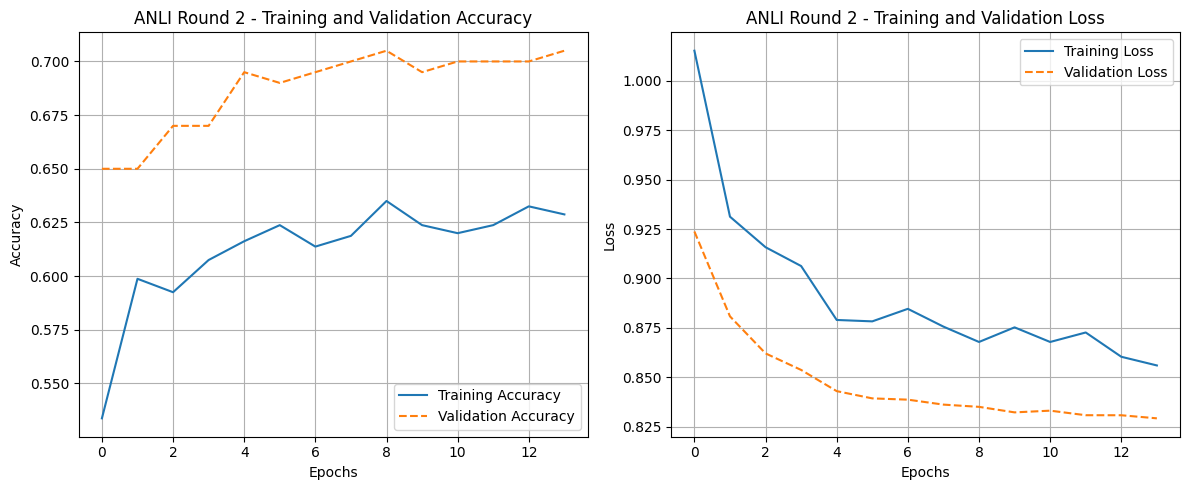

In [36]:
# ANLI Round 2
plot_training_history(history_anli_r2, title_prefix="ANLI Round 2")

In [37]:
# Call the function for ANLI round 3
history_anli_r3, test_loss_anli_r3, test_accuracy_anli_r3, trained_model_anli_r3 = train_and_evaluate(
    X_anli_r3_train, y_anli_r3_train, X_anli_r3_test, y_anli_r3_test, epochs=20, batch_size=32
)

print("Test loss on ANLI R3:", test_loss_anli_r3)
print("Test accuracy on ANLI R3:", test_accuracy_anli_r3)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.5048 - loss: 0.9991 - val_accuracy: 0.6542 - val_loss: 0.8911 - learning_rate: 5.0000e-04
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5697 - loss: 0.9681 - val_accuracy: 0.6667 - val_loss: 0.8443 - learning_rate: 5.0000e-04
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6329 - loss: 0.9004 - val_accuracy: 0.6708 - val_loss: 0.8224 - learning_rate: 5.0000e-04
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6014 - loss: 0.9123 - val_accuracy: 0.6625 - val_loss: 0.8096 - learning_rate: 5.0000e-04
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6170 - loss: 0.8967 - val_accuracy: 0.6625 - val_loss: 0.8026 - learning_rate: 5.0000e-04
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6125 - loss: 0.8919 - val_accuracy: 0.6667 - val_loss: 0.7940 - learning_rate: 5.0000e-04
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5995 - loss

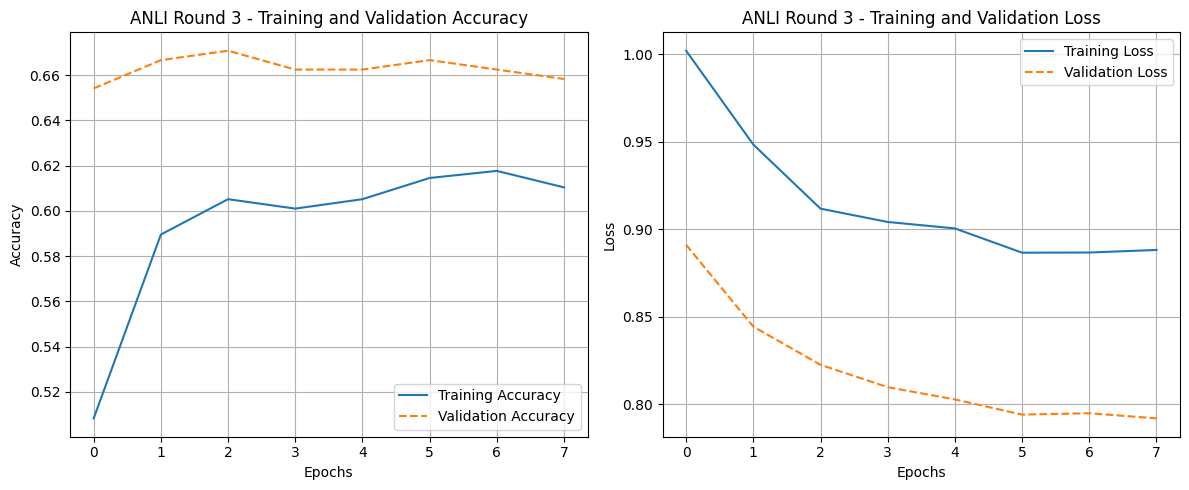

In [38]:
# ANLI Round 3
plot_training_history(history_anli_r3, title_prefix="ANLI Round 3")

In [39]:
from sklearn.model_selection import train_test_split


# Fit the scaler to each task's feature data
X_all_scaled = scaler.fit_transform(X_all)
y_all_encoded = encoder.fit_transform(y_all.reshape(-1, 1))

# Define the test size and random state for reproducibility
test_size = 0.2
random_state = 42

# Split data for SNLI task
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(
    X_all_scaled, y_all_encoded, test_size=test_size, random_state=random_state
)


# Apply Data Conversion and Reshaping for Other Tasks
X_all_train = ensure_dense(X_all_train)
X_all_test = ensure_dense(X_all_test)
y_all_train = ensure_dense(y_all_train)
y_all_test = ensure_dense(y_all_test)

# combined
X_all_train = ensure_reshaped(X_all_train)
X_all_test = ensure_reshaped(X_all_test)



# Call the function for a specific task (example: snli)
history_combined, test_loss_combined, test_accuracy_combined, trained_model_combined = train_and_evaluate(
    X_all_train, y_all_train, X_all_test, y_all_test, epochs=20, batch_size=32
)

print("Test loss on Combined tasks:", test_loss_combined)
print("Test accuracy on Combined tasks:", test_accuracy_combined)

Epoch 1/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8437 - loss: 0.5050 - val_accuracy: 0.8889 - val_loss: 0.3257 - learning_rate: 5.0000e-04
Epoch 2/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8919 - loss: 0.3260 - val_accuracy: 0.8910 - val_loss: 0.3202 - learning_rate: 5.0000e-04
Epoch 3/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8929 - loss: 0.3153 - val_accuracy: 0.8929 - val_loss: 0.3212 - learning_rate: 5.0000e-04
Epoch 4/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8895 - loss: 0.3254 - val_accuracy: 0.8927 - val_loss: 0.3205 - learning_rate: 5.0000e-04
Epoch 5/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8927 - loss: 0.3140 - val_accuracy: 0.8901 - val_loss: 0.3173 - learning_rate: 5.0000e-04
Epoch 6/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8917 - loss: 0.3170 - val_accuracy: 0.8918 - val_loss: 0.3159 - learning_rate: 5.0000e-04
Epoch 7/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 

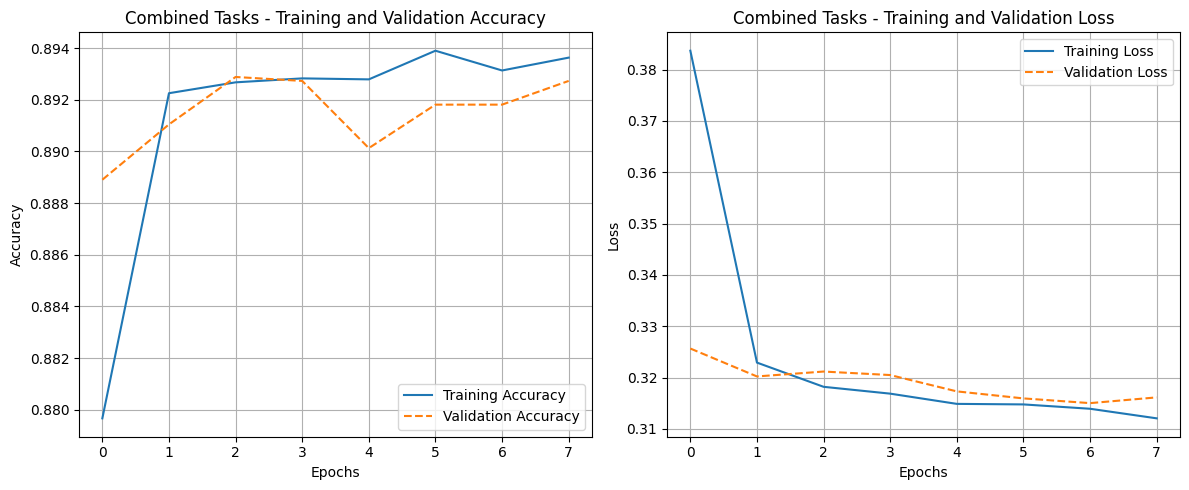

In [41]:
# ANLI Round 3
plot_training_history(history_combined, title_prefix="Combined Tasks")